In [364]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt

In [365]:
# Pass NFL Betting data subset into a dataframe
df = pd.read_csv('NFL_Bet_Data.csv')
df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN


### Trend of NFL Points per Game since 1966

In [366]:
# With recent rule changes that favorite the offense, I'm expecting to see an upward trend in points over the last 50 years

# I only want to look at regular season games so filtering out playoffs
avgpts_df = df.loc[(df['schedule_playoff'] == False)]

# Only interested in total points so filtering out all other columns
avgpts_df = df[['schedule_season', 'score_home', 'score_away',]]

# Remove games that have NaN in score_home or score_away
avgpts_df = avgpts_df.dropna()

# Build a new field that is Total points between home and away scores
avgpts_df['Total_Points'] = avgpts_df.score_home + avgpts_df.score_away

# Use sql to build a dataset that I can plot with points per game by season
pts_per_game = ps.sqldf("Select schedule_season as Season, sum(Total_Points)/count(schedule_season) as Points_Per_Game FROM avgpts_df group by schedule_season")

pts_per_game.head()

,Season,Points_Per_Game
0,1966,44.111111
1,1967,44.355556
2,1968,42.218085
3,1969,41.841270
4,1970,38.084656


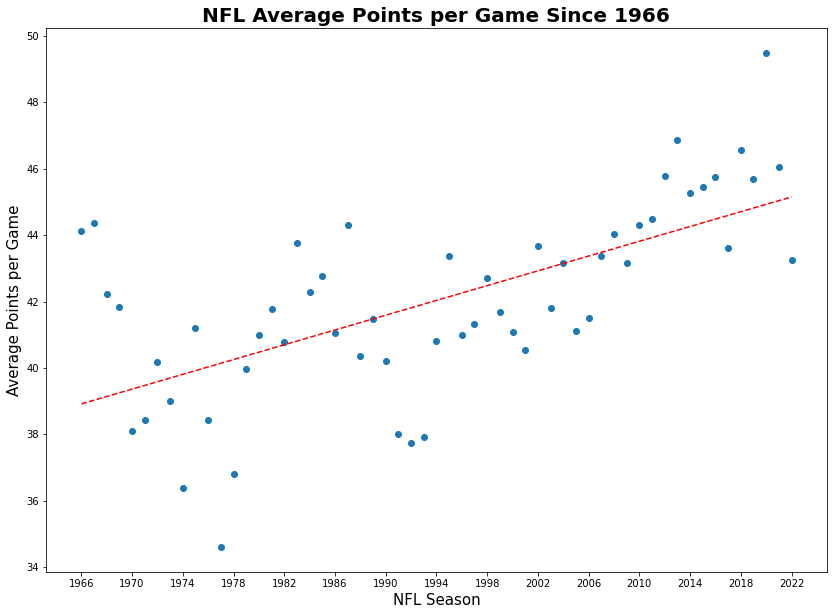

In [367]:
# Plot the points per game by season and then add a trend line to the scatter plot
x = pts_per_game.Season
y = pts_per_game.Points_Per_Game

plt.figure(figsize=(14,10))
plt.xticks(pts_per_game.Season[::4])
plt.title('NFL Average Points per Game Since 1966', fontdict={'fontweight':'bold', 'fontsize': 20})
plt.xlabel('NFL Season', fontdict={'fontsize': 15})
plt.ylabel('Average Points per Game', fontdict={'fontsize': 15})
plt.scatter(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

### Most Undervalued/Overvalued Team by NFL Sports Betting Line creators over the last 10 years

In [368]:
# By finding the team that has the most wins against the point spreads created by Sportsbooks, we can find the most undervalued team

# Drop any line of data that doesn't have spread_favorite and remove any data that is less than 2012 season and current season
# Remove playoff games
# Remove columns that won't be used

spread_df = df[~df['spread_favorite'].isnull()]
spread_df = spread_df.loc[(spread_df['schedule_season'] > 2011) & (spread_df['schedule_season'] < 2022)]
spread_df = spread_df.loc[spread_df['schedule_playoff'] == False]
spread_df = spread_df[['schedule_season', 'schedule_week', 'team_home', 'team_away', 'score_home', 'score_away', 'team_favorite_id', 'spread_favorite']]
spread_df = spread_df.reset_index()
spread_df

,index,schedule_season,schedule_week,team_home,team_away,score_home,score_away,team_favorite_id,spread_favorite
0,10542,2012,1,New York Giants,Dallas Cowboys,17.0,24.0,NYG,-4.0
1,10543,2012,1,Arizona Cardinals,Seattle Seahawks,20.0,16.0,SEA,-3.0
2,10544,2012,1,Chicago Bears,Indianapolis Colts,41.0,21.0,CHI,-10.0
3,10545,2012,1,Cleveland Browns,Philadelphia Eagles,16.0,17.0,PHI,-9.5
4,10546,2012,1,Denver Broncos,Pittsburgh Steelers,31.0,19.0,DEN,-2.0
...,...,...,...,...,...,...,...,...,...
2571,13214,2021,18,Los Angeles Rams,San Francisco 49ers,24.0,27.0,SF,-3.5
2572,13215,2021,18,Miami Dolphins,New England Patriots,33.0,24.0,NE,-6.0
2573,13216,2021,18,Minnesota Vikings,Chicago Bears,31.0,17.0,MIN,-3.5
2574,13217,2021,18,New York Giants,Washington Football Team,7.0,22.0,WAS,-6.0


In [369]:
# Alter team names that have changed over the last 10 years to the current team name

spread_df.loc[spread_df['team_home'] == 'San Diego Chargers', 'team_home'] = 'Los Angeles Chargers'
spread_df.loc[spread_df['team_home'] == 'St. Louis Rams', 'team_home'] = 'Los Angeles Rams'
spread_df.loc[spread_df['team_home'] == 'Oakland Raiders', 'team_home'] = 'Las Vegas Raiders'
spread_df.loc[spread_df['team_home'] == 'Washington Football Team', 'team_home'] = 'Washington Commanders'
spread_df.loc[spread_df['team_home'] == 'Washington Redskins', 'team_home'] = 'Washington Commanders'

spread_df.loc[spread_df['team_away'] == 'San Diego Chargers', 'team_away'] = 'Los Angeles Chargers'
spread_df.loc[spread_df['team_away'] == 'St. Louis Rams', 'team_away'] = 'Los Angeles Rams'
spread_df.loc[spread_df['team_away'] == 'Oakland Raiders', 'team_away'] = 'Las Vegas Raiders'
spread_df.loc[spread_df['team_away'] == 'Washington Football Team', 'team_away'] = 'Washington Commanders'
spread_df.loc[spread_df['team_away'] == 'Washington Redskins', 'team_away'] = 'Washington Commanders'

print(pd.concat([spread_df['team_home'], spread_df['team_away']]).unique())

['New York Giants' 'Arizona Cardinals' 'Chicago Bears' 'Cleveland Browns'
 'Denver Broncos' 'Detroit Lions' 'Green Bay Packers' 'Houston Texans'
 'Kansas City Chiefs' 'Minnesota Vikings' 'New Orleans Saints'
 'New York Jets' 'Tampa Bay Buccaneers' 'Tennessee Titans'
 'Baltimore Ravens' 'Las Vegas Raiders' 'Buffalo Bills'
 'Carolina Panthers' 'Cincinnati Bengals' 'Indianapolis Colts'
 'Jacksonville Jaguars' 'Miami Dolphins' 'New England Patriots'
 'Philadelphia Eagles' 'Pittsburgh Steelers' 'Los Angeles Chargers'
 'San Francisco 49ers' 'Seattle Seahawks' 'Los Angeles Rams'
 'Atlanta Falcons' 'Dallas Cowboys' 'Washington Commanders']


In [370]:
# Bring in a CSV breaking down team abbreviation so I can equate favorite to an actual team name
# PICK means that there isn't a favorite and teams are equal
team_df = pd.read_csv("TeamABV.csv")
team_df.head()

,Abbreviation,Team_Favorite
0,NYG,New York Giants
1,SEA,Seattle Seahawks
2,CHI,Chicago Bears
3,PHI,Philadelphia Eagles
4,DEN,Denver Broncos


In [371]:
# Merge the 2 dataframes together and then drop the abbreviation/index/team_favorite_id fields
spread_df = ps.sqldf("Select * FROM spread_df sdf join team_df tdf on sdf.team_favorite_id = tdf.Abbreviation")
spread_df = spread_df.drop(columns=['index', 'team_favorite_id', 'Abbreviation'])
spread_df.head()

,schedule_season,schedule_week,team_home,team_away,score_home,score_away,spread_favorite,Team_Favorite
0,2012,1,New York Giants,Dallas Cowboys,17.0,24.0,-4.0,New York Giants
1,2012,1,Arizona Cardinals,Seattle Seahawks,20.0,16.0,-3.0,Seattle Seahawks
2,2012,1,Chicago Bears,Indianapolis Colts,41.0,21.0,-10.0,Chicago Bears
3,2012,1,Cleveland Browns,Philadelphia Eagles,16.0,17.0,-9.5,Philadelphia Eagles
4,2012,1,Denver Broncos,Pittsburgh Steelers,31.0,19.0,-2.0,Denver Broncos


In [372]:
# Adjust the home team score based on the point spread
# If the home team is favored, subtract the point spread. If the home team is the underdog, add the point spread

# Create new field of home_team_adjusted score
spread_df['home_team_adjusted'] = np.where(spread_df['team_home'] == spread_df['Team_Favorite'], spread_df['score_home'] + spread_df['spread_favorite'],
                                  np.where(spread_df['team_home'] != spread_df['Team_Favorite'], spread_df['score_home'] - spread_df['spread_favorite'], "Wrong"))

# Convert home team adjusted score to a float
spread_df['home_team_adjusted'] = spread_df['home_team_adjusted'].astype(float)

# Compared adjusted home team score to the away team score to see who won against the point spread, return winning team into Spread_Winner
# If the adjusted and away team score are equal, return Push
# Then drop the home_team_adjusted score field
spread_df['Spread_Winner'] = np.where(spread_df['home_team_adjusted'] > spread_df['score_away'], spread_df['team_home'],
                           np.where(spread_df['score_away'] > spread_df['home_team_adjusted'], spread_df['team_away'], 'Push'))
spread_df = spread_df.drop(columns=['home_team_adjusted'])

# Use SQL to get the the Total Spread Wins by team
Spread_Wins = ps.sqldf("Select Spread_Winner as Team, count(Spread_Winner) Spread_Wins from spread_df where Spread_Winner <> 'Push' group by Spread_Winner order by count(Spread_Winner) desc")
Spread_Wins.head()

,Team,Spread_Wins
0,Minnesota Vikings,93
1,New England Patriots,91
2,New Orleans Saints,88
3,Cincinnati Bengals,88
4,Green Bay Packers,87


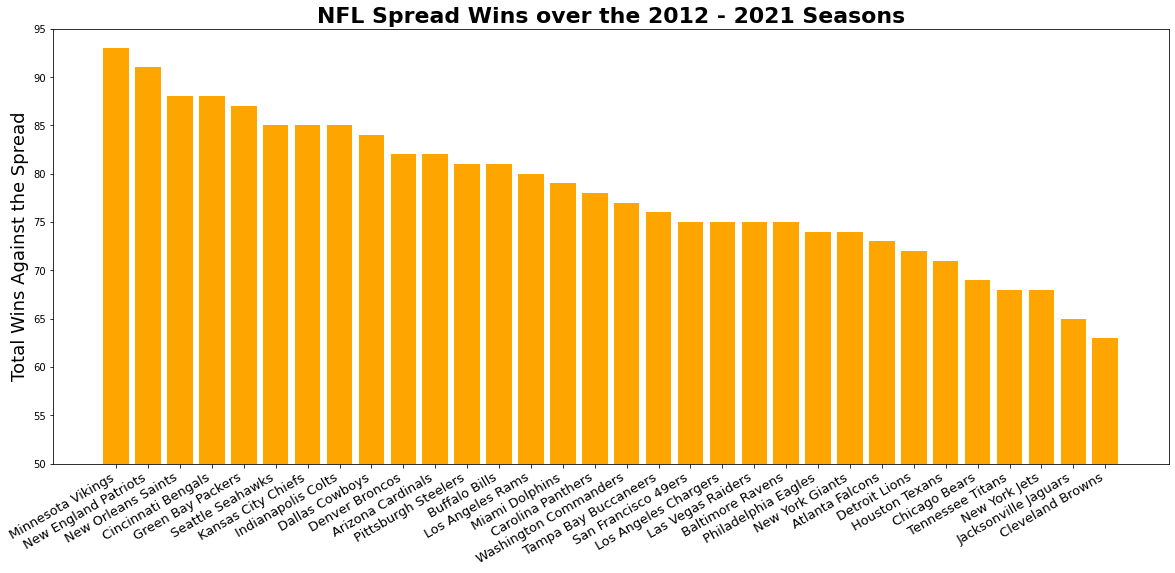

In [373]:
# Create a graph showing Spread_Wins by Team
plt.figure(figsize=(20 ,8))
plt.title('NFL Spread Wins over the 2012 - 2021 Seasons', fontdict={'fontweight':'bold', 'fontsize': 22})
plt.bar(Spread_Wins.Team, Spread_Wins.Spread_Wins, color='orange')
# plt.bar(Spread_Wins.Spread_Wins, Spread_Wins.Team)
plt.xticks(rotation=30, ha='right', fontsize=13)
plt.ylabel('Total Wins Against the Spread', fontdict={'fontsize': 18})
plt.ylim((50, 95))
plt.show()

###### Over the last 10 seasons, the most Undervalued Team in the NFL against the point spread is the Minnesota Vikings
###### Over the last 10 seasons, the most Overvalued Team in the NFL against the point spread is the Cleveland Browns

### Does the cold weather months have an effect on NFL Total Point?